# BASpy

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [9]:
import baspy as bp

### Retrieve a filtered version of the CMIP5 catalogue as a Pandas DataFrame
df = bp.catalogue(
    dataset="cmip5",
    Model="EC-EARTH",
    # RunID="r1i1p1",
    Experiment="historical",
    Var=["ts"],
    Frequency="mon",
)

ds_list = []
### Iterate over rows in catalogue
for index, row in df.iterrows():
    ### In Xarray
    ds = bp.open_dataset(row)
    ds = (
        ds.sel(time=slice("1950", "2020"))
        .sel(lat=slice(-40 - 1, 40 + 2), lon=slice(100 - 1, 290 + 2))
        .interp(lon=list(range(-40, 40 + 1)), lat=list(range(100, 290 + 1)))
    )
    ds_list.append(ds)

>> WARNING: Multiple file extensions present in /badc/cmip5/data/cmip5/output1/ICHEC/EC-EARTH/historical/mon/atmos/Amon/r1i1p1/v20131231/ts/ <<, keeping only .nc4


/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning: Passing method to Flo

In [5]:
ds.sel(time=slice("1950", "2020")).sel(lat=slice(-40, 40), lon=slice(100, 200))

<xarray.Dataset>
Dimensions:     (lat: 72, lon: 89, nv: 2, tbnds: 2, time: 720)
Coordinates:
  * lon         (lon) float64 100.1 101.2 102.4 103.5 ... 196.9 198.0 199.1
  * lat         (lat) float64 -39.81 -38.69 -37.57 -36.45 ... 37.57 38.69 39.81
  * time        (time) datetime64[ns] 1950-01-16T12:00:00 ... 2009-12-16T12:0...
Dimensions without coordinates: nv, tbnds
Data variables:
    lon_bounds  (time, lon, nv) float64 dask.array<chunksize=(12, 89, 2), meta=np.ndarray>
    lat_bounds  (time, lat, nv) float64 dask.array<chunksize=(12, 72, 2), meta=np.ndarray>
    time_bnds   (time, tbnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    ts          (time, lat, lon) float32 dask.array<chunksize=(12, 72, 89), meta=np.ndarray>
Attributes: (12/29)
    CDI:                    Climate Data Interface version 1.4.5 (http://code...
    institution:            EC-Earth (European Earth System Model)
    Conventions:            CF-1.4
    institute_id:           ICHEC
    experiment_id:          historical
    forcing:                Nat,Ant
    ...                     ...
    cmor_version:           2.8.0
    CDO:                    Climate Data Operators version 1.4.5 (http://code...
    comment:                Equilibrium reached after preindustrial spin-up a...
    branch_time:            2100.0
    model_id:               EC-EARTH
    history:                Fri Nov 22 21:42:08 2013: ncatted -a model_id,glo...

/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/users/sithom/seager19/env/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning: Passing method to Flo

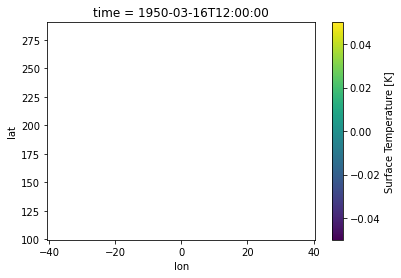

In [15]:
ds.ts.isel(time=2).plot()

In [6]:
print(df)

       Centre     Model  Experiment Frequency SubModel  CMOR   RunID  \
230012  ICHEC  EC-EARTH  historical       mon    atmos  Amon  r1i1p1   

          Version Var  StartDate  EndDate  \
230012  v20131231  ts     195001   200912   

                                                     Path  \
230012  /ICHEC/EC-EARTH/historical/mon/atmos/Amon/r1i1...   

                                                DataFiles dataset  
230012  ts_Amon_EC-EARTH_historical_r1i1p1_195001-1950...   cmip5  


In [10]:
import xarray as xr
xr.set_options(display_style='text')

In [14]:
ls -lash /badc/cmip5/data/cmip5/output1/ICHEC/EC-EARTH/historical/mon/atmos/Amon/r1i1p1/v20131231/ts

total 60K
  0 drwxr-x--- 1 badc open  0 Feb 15  2019 ./
  0 drwxr-x--- 1 badc open  0 Feb 15  2019 ../
512 lrwxrwxrwx 1 badc open 75 Feb 15  2019 ts_Amon_EC-EARTH_historical_r1i1p1_195001-195012.nc -> ../../files/ts_20130225/ts_Amon_EC-EARTH_historical_r1i1p1_195001-195012.nc
512 lrwxrwxrwx 1 badc open 76 Feb 15  2019 ts_Amon_EC-EARTH_historical_r1i1p1_195001-195012.nc4 -> ../../files/ts_20131231/ts_Amon_EC-EARTH_historical_r1i1p1_195001-195012.nc4
512 lrwxrwxrwx 1 badc open 75 Feb 15  2019 ts_Amon_EC-EARTH_historical_r1i1p1_195101-195112.nc -> ../../files/ts_20130225/ts_Amon_EC-EARTH_historical_r1i1p1_195101-195112.nc
512 lrwxrwxrwx 1 badc open 76 Feb 15  2019 ts_Amon_EC-EARTH_historical_r1i1p1_195101-195112.nc4 -> ../../files/ts_20131231/ts_Amon_EC-EARTH_historical_r1i1p1_195101-195112.nc4
512 lrwxrwxrwx 1 badc open 75 Feb 15  2019 ts_Amon_EC-EARTH_historical_r1i1p1_195201-195212.nc -> ../../files/ts_20130225/ts_Amon_EC-EARTH_historical_r1i1p1_195201-195212.nc
512 lrwxrwxrwx 1 badc o